In [4]:
import numpy as np  
import pandas as pd    
data = pd.read_csv(r"houseprice.csv")  
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.shape

(1460, 81)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
cols = list(data.columns)

In [8]:
drop_cols = [i for i in cols if data[i].dtype == 'object']

In [9]:
data.drop(drop_cols, axis=1, inplace=True)

In [10]:
f = []
for i in range(len(data)):
    if data['SalePrice'][i] < 100000:
        f.append(0)
    elif 100000 <= data['SalePrice'][i] < 500000:
        f.append(1)
    else:
        f.append(2)
data['SalePrice'] = f

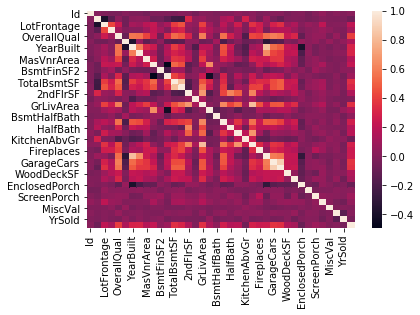

In [11]:
import seaborn as sns
cor = data.corr()
sns.heatmap(cor)

In [12]:
X = data.drop(['SalePrice', 'Id', 'LotFrontage', 'GarageYrBlt', 'MasVnrArea'], axis=1)
y = data['SalePrice']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)


In [15]:
from sklearn.decomposition import PCA
pca = PCA()  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test) 

In [16]:
col_x = list(X.columns)
explained_variance = pca.explained_variance_ratio_
v = [round(i*100,2) for i in explained_variance]
d = {'columns':col_x , 'variance %': v}
pd.DataFrame(d, columns=['columns', 'variance %'])

,columns,variance %
0,MSSubClass,19.03
1,LotArea,9.75
2,OverallQual,6.43
3,OverallCond,6.10
4,YearBuilt,4.56
5,YearRemodAdd,3.71
6,BsmtFinSF1,3.68
7,BsmtFinSF2,3.47
8,BsmtUnfSF,3.35
9,TotalBsmtSF,3.22


In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.952054794520548

In [19]:
X = data.drop(['SalePrice', 'Id', 'LotFrontage', 'GarageYrBlt', 'MasVnrArea'], axis=1)
y = data['SalePrice']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=24)  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9429223744292238